<a href="https://colab.research.google.com/github/VincentWangzilu/NYC-Airbnb-Project/blob/main/NYC_Airbnb_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New York City Airbnb Project: Data Exploration, Visualization, and Prediction

# Introduction

### Business Problem
Airbnb is one of the fastest-growing tech companies in the United States. It is projected to be listed as a public company in mid-December 2020 at a targeted evaluation of between \$30 and \$33 billion. It provides a platform for hosts to accommodate guests with short-term lodging and tourism-related activities. Guests can search for lodging using filters such as lodging type, dates, location, and price, and can search for specific types of homes, such as bed and breakfasts, unique homes, and vacation homes. Airbnb provides an alternative solution besides staying in a hotel. Tourist are able to live in a traditional local home at a more affordable price and have totally different living experiences. 

In this project, we are interested in the price for each individual listing in the dataset and how each feature may affect the price of a listed home. This dataset contains data about the location, room type, minimum nights required for booking, review, hosts, and availability of a home and we will see which features play the major role here. 

### Data Collection
The dataset we are using was published by *Dgomonov* on Kaggle.com. Here is the link for the original dataset: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data. This dataset was part of the Airbnb public dataset posted at 'Inside Airbnb' page, the link is also posted here: http://insideairbnb.com/get-the-data.html.


# Overview of Dataset

### Loading the Data

In [195]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
path = '/content/drive/MyDrive/Colab Notebooks/AB_NYC_2019.csv'
df = pd.read_csv(path)

In [196]:
print('The dimension of this dataset is: ' + str(df.shape))

The dimension of this dataset is: (48895, 16)


## Sample of Dataset

Let's first look at a sample of this dataset.

In [197]:
df.sample(5)

id  ... availability_365
23252  18826370  ...              365
8911    6831518  ...                0
12398   9559239  ...                0
32495  25474632  ...               61
31087  24129287  ...                0

[5 rows x 16 columns]

## Feature Names and Data Types

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We see all features have proper names and correct data types.

## Statistical Measures of Dataset

In [199]:
df.describe()

id  ...  availability_365
count  4.889500e+04  ...      48895.000000
mean   1.901714e+07  ...        112.781327
std    1.098311e+07  ...        131.622289
min    2.539000e+03  ...          0.000000
25%    9.471945e+06  ...          0.000000
50%    1.967728e+07  ...         45.000000
75%    2.915218e+07  ...        227.000000
max    3.648724e+07  ...        365.000000

[8 rows x 10 columns]

One thing we notice here is that 'price' feature has a minimum value of 0, which doesn't make sense. Therefore we will filter ouot those entries in this dataset.

## Missing Values

In [200]:
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum())*100)/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

Total    Percent
reviews_per_month               10052  20.558339
last_review                     10052  20.558339
host_name                          21   0.042949
name                               16   0.032723
availability_365                    0   0.000000
calculated_host_listings_count      0   0.000000
number_of_reviews                   0   0.000000
minimum_nights                      0   0.000000
price                               0   0.000000
room_type                           0   0.000000
longitude                           0   0.000000
latitude                            0   0.000000
neighbourhood                       0   0.000000
neighbourhood_group                 0   0.000000
host_id                             0   0.000000
id                                  0   0.000000

In this step, we will relace NaN values in 'reviews_per_month' feature with 0 and drop rows with empty 'name'; More importantly, we will only keep rows with 'price' larger than 0. 

# Data Cleaning for EDA

In [201]:
df.fillna({'reviews_per_month':0}, inplace=True)
df.dropna(subset = ['name'], axis = 0, inplace = True)
df.drop(['id','host_name','last_review'], axis=1, inplace=True)
df = df[df['price'] > 0]


In [202]:
print(df.isnull().sum())
print(df.describe())

host_id  ...  availability_365
count  4.886800e+04  ...      48868.000000
mean   6.763215e+07  ...        112.787161
std    7.862640e+07  ...        131.618305
min    2.438000e+03  ...          0.000000
25%    7.812758e+06  ...          0.000000
50%    3.079133e+07  ...         45.000000
75%    1.074344e+08  ...        227.000000
max    2.743213e+08  ...        365.000000

[8 rows x 9 columns]

Now the dataset is all clean and ready for Exploratory Data Analysis!

# Exploratory Data Analysis (EDA)

## Statistical Analysis

### Price

In [203]:
df['price'].describe()

count    48868.000000
mean       152.756732
std        240.202905
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

### Host ID

In [204]:
len(df['host_id'].unique())

37441

We see we have total of 37457 different hosts in this dataset, which is quite a lot. We would also like to know the count of listings for the top 10 hosts.

In [205]:
df['host_id'].value_counts().head(10)

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

### Host Listings Count

In [206]:
df['calculated_host_listings_count'].sort_values(ascending = False)

44430    327
41746    327
42787    327
45166    327
45165    327
        ... 
28004      1
28003      1
28001      1
27999      1
24449      1
Name: calculated_host_listings_count, Length: 48868, dtype: int64

The Calculated field result does match our observations. So we will use the calculated feature for further analysis. 

### Neighbourhood Group

In [207]:
df['neighbourhood_group'].value_counts()

Manhattan        21651
Brooklyn         20089
Queens            5666
Bronx             1089
Staten Island      373
Name: neighbourhood_group, dtype: int64

### Neighbourhood

In [208]:
print(len(df['neighbourhood'].unique()))
print(df['neighbourhood'].unique()[:10])
print(df['neighbourhood'].value_counts().head(10))

221
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown']
Williamsburg          3917
Bedford-Stuyvesant    3709
Harlem                2657
Bushwick              2460
Upper West Side       1970
Hell's Kitchen        1957
East Village          1852
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64


There are over 200 neighbourhoods in this dataset. We displayed 10 most popular neighbourhoods and their counts.

### Room Types

In [209]:
df['room_type'].value_counts()

Entire home/apt    25400
Private room       22311
Shared room         1157
Name: room_type, dtype: int64

Here we see the majority rooms in the dataset are either entire home or private room. Shared rooms take up very small part.

### Mininum Nights

In [210]:
df['minimum_nights'].describe()

count    48868.000000
mean         7.010948
std         20.017604
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

### Number of Reviews

In [211]:
df['number_of_reviews'].describe()

count    48868.000000
mean        23.278730
std         44.556899
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

### Reviews per Month

In [212]:
df['reviews_per_month'].describe()

count    48868.000000
mean         1.091138
std          1.597363
min          0.000000
25%          0.040000
50%          0.370000
75%          1.580000
max         58.500000
Name: reviews_per_month, dtype: float64

### Host Listings Count

In [213]:
df['calculated_host_listings_count'].describe()

count    48868.000000
mean         7.146538
std         32.961406
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

### Availability

In [214]:
df['availability_365'].describe()

count    48868.000000
mean       112.787161
std        131.618305
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

## Data Visualization

### Top 10 Host IDs with Most Listings

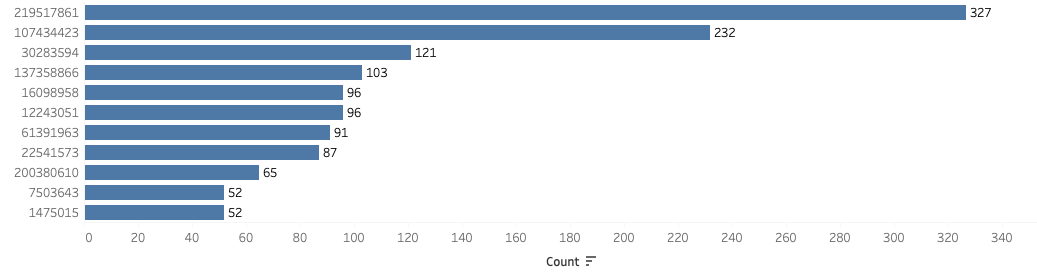

### Neighbourhood Group

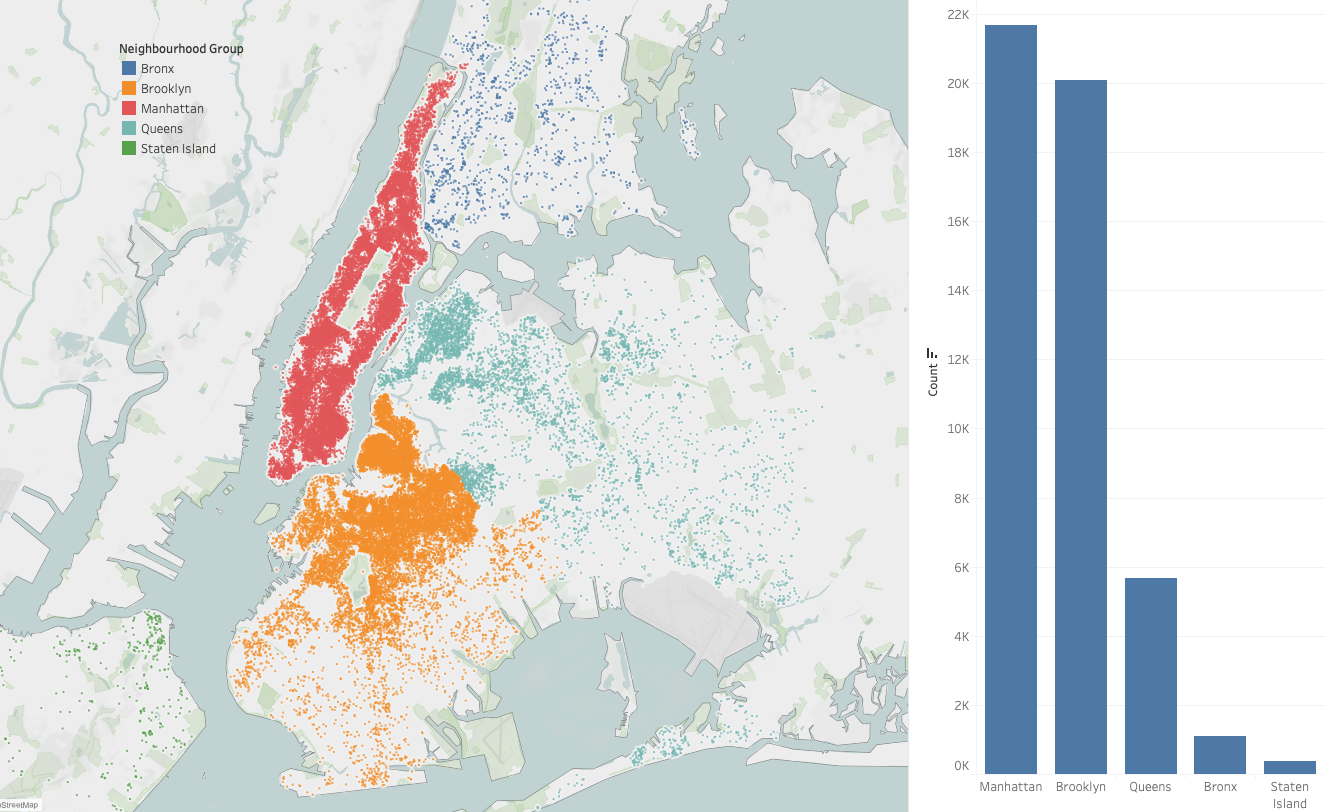

From here we wee Manhattan and Brooklyn are the 2 largest groups, which are much larger than the remaining 3 groups. 

### Top 10 Most Listed Neighbourhoods

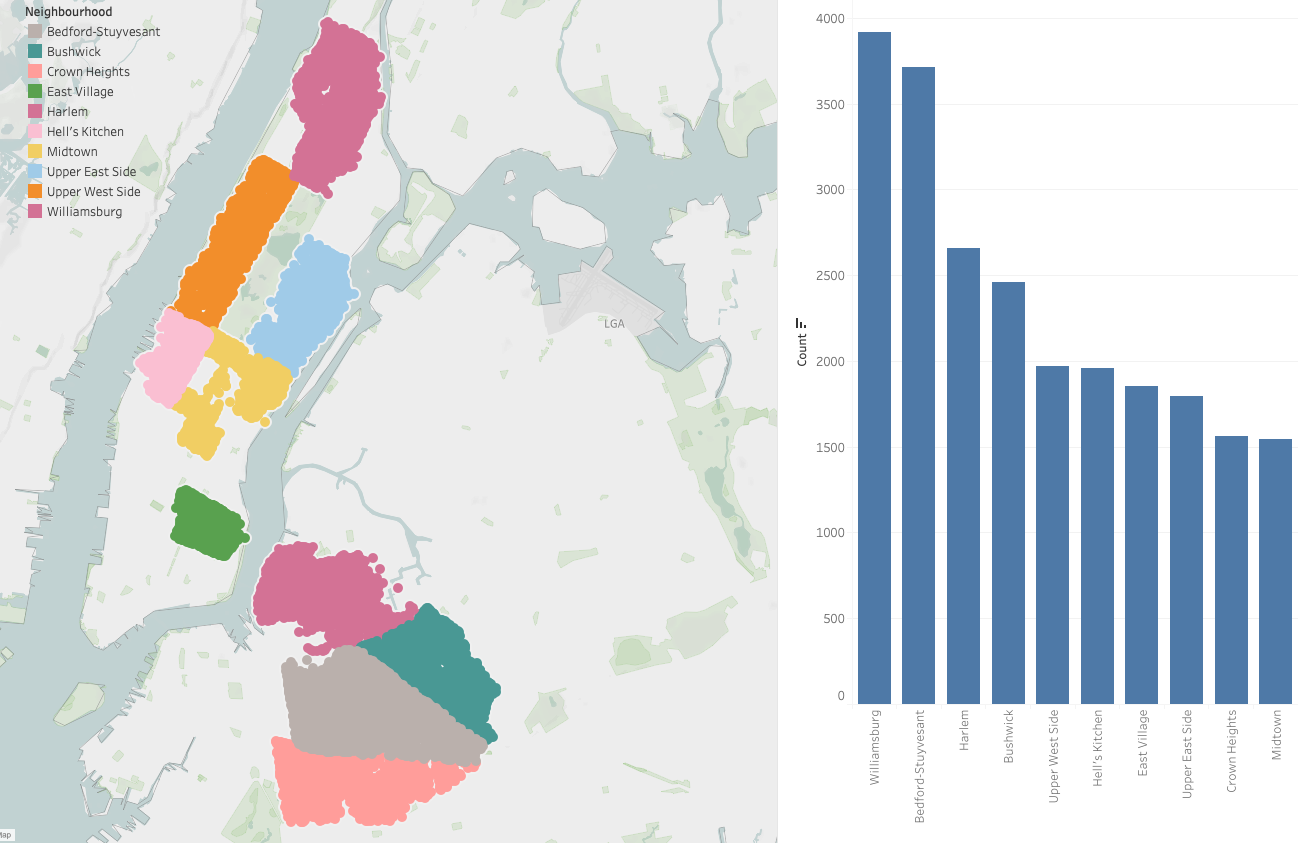

We can see the top 10 neighbourhoods are within Manhattan - Brooklyn region.

### Room Types

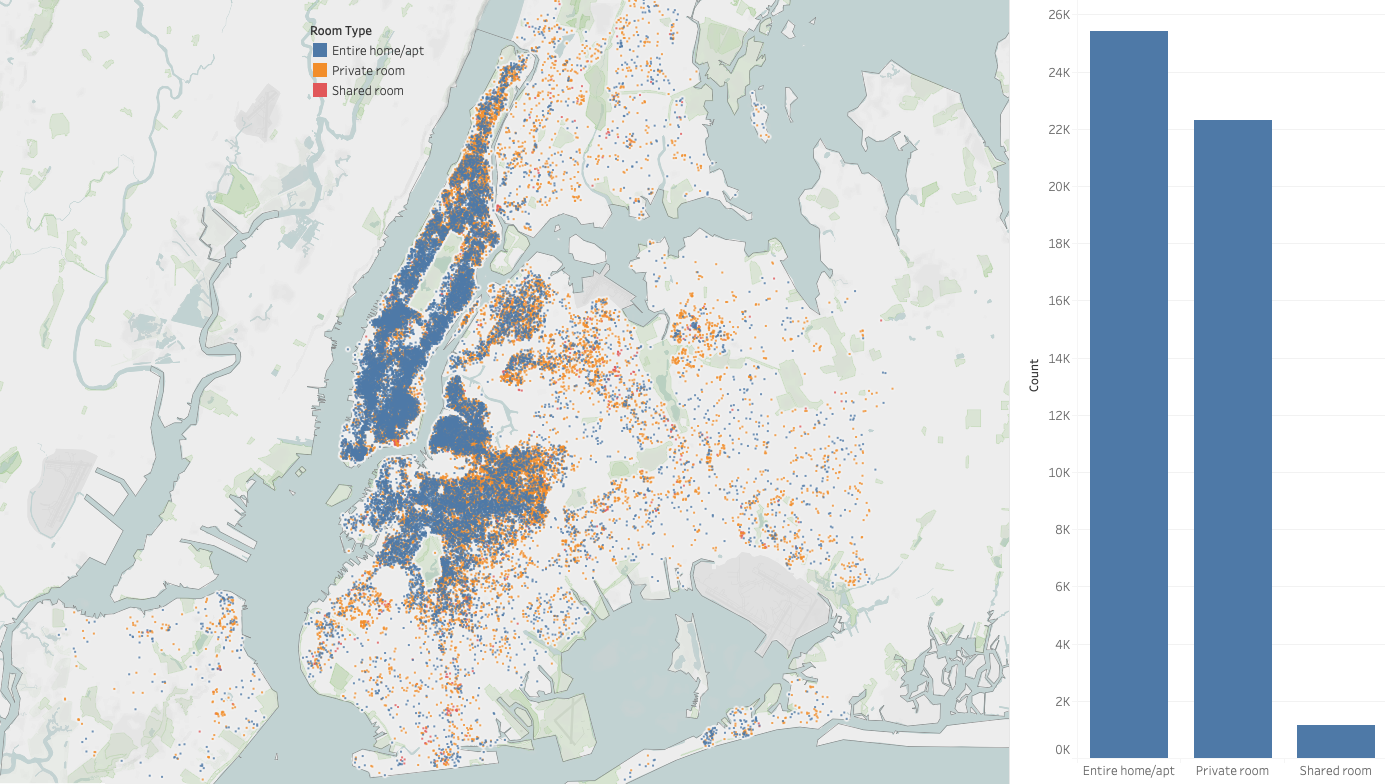

Entire home/apt are mostly located at Manhatton and Brookyln. Private room are mostly located further away from the city. 

### Minimum Nights

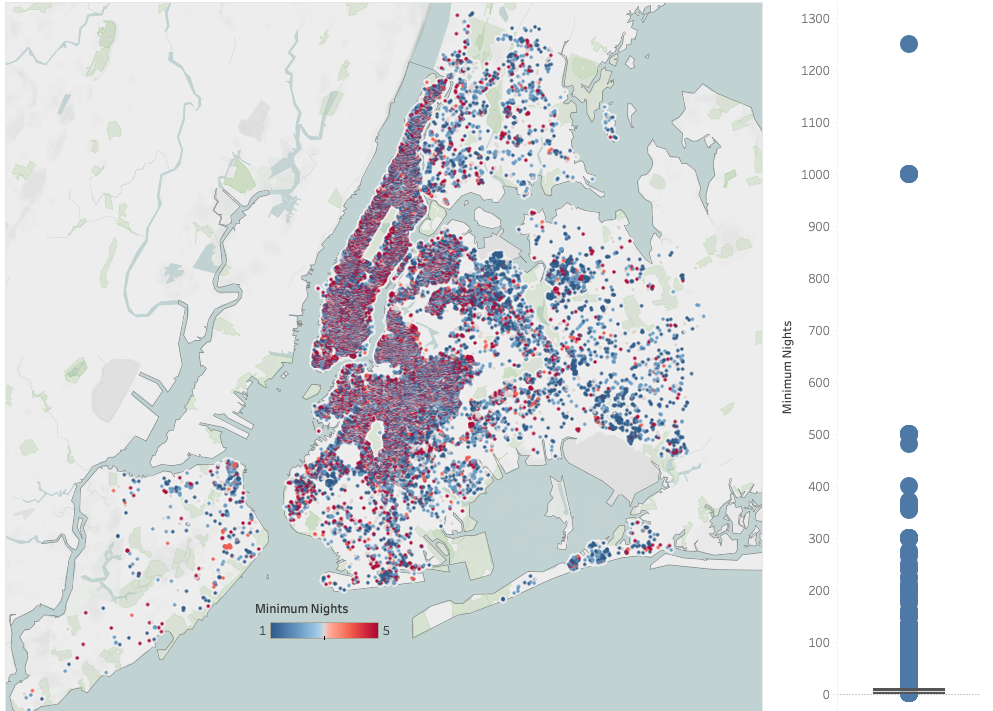

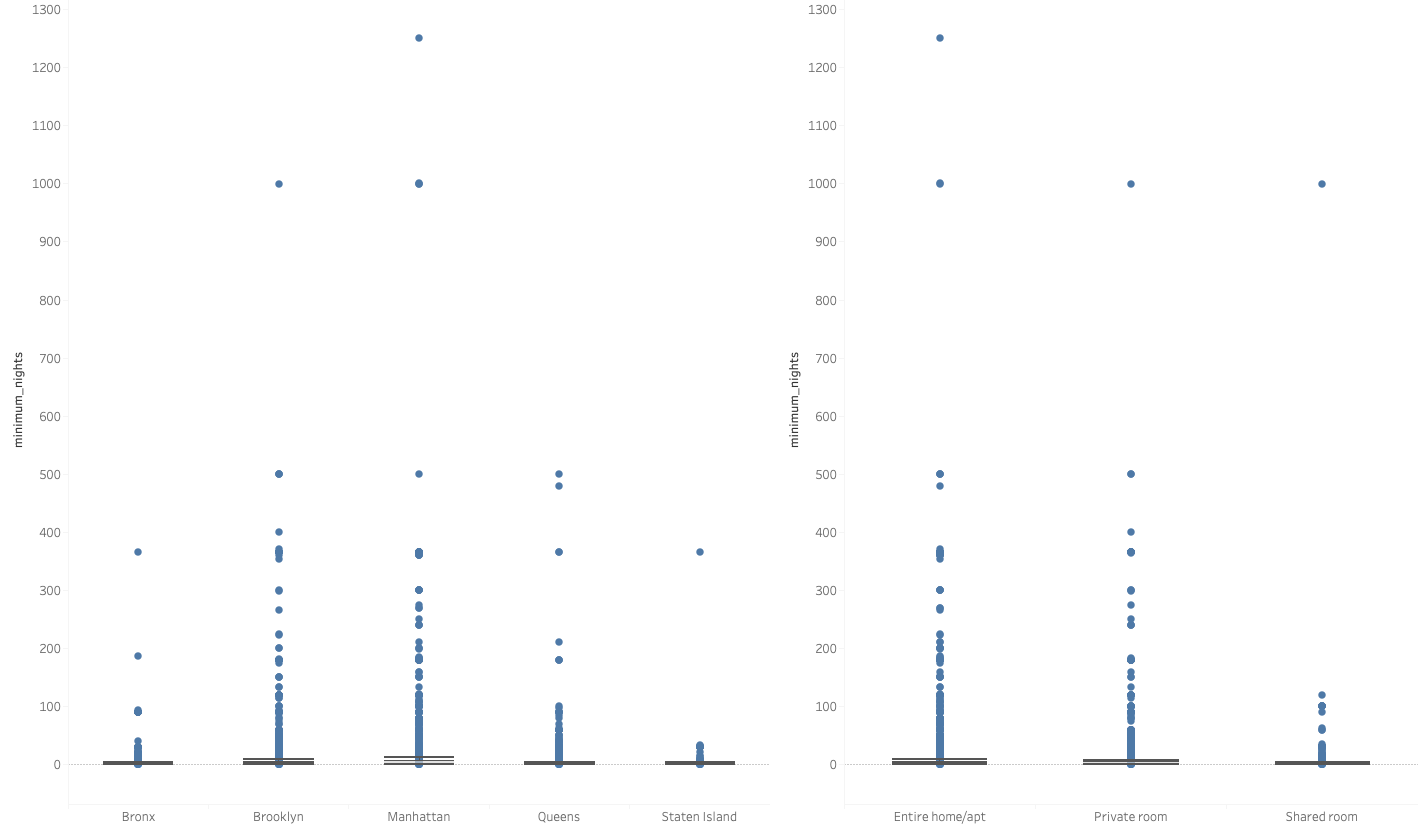

### Number of Reviews

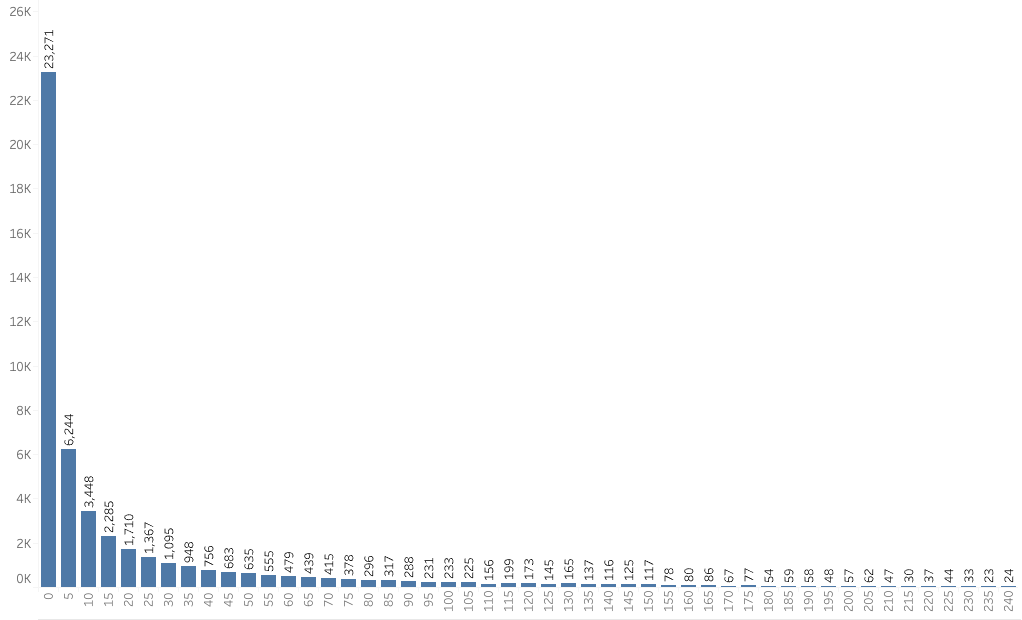

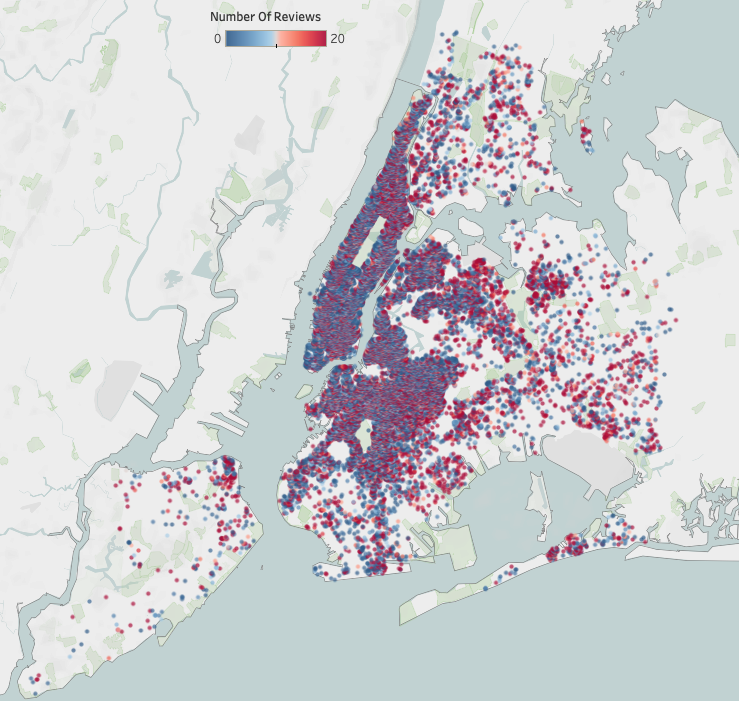

### Availability

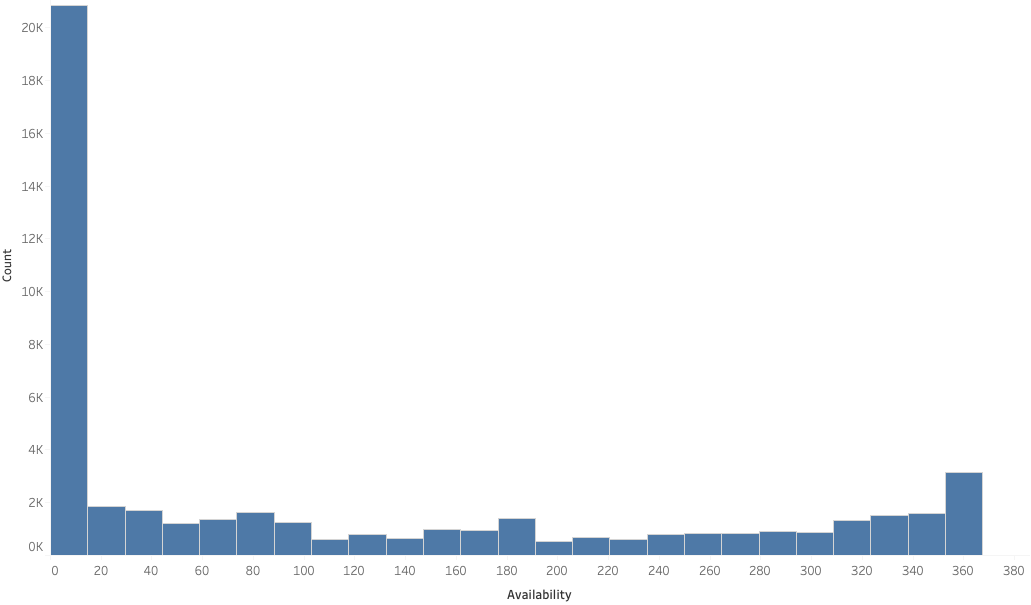

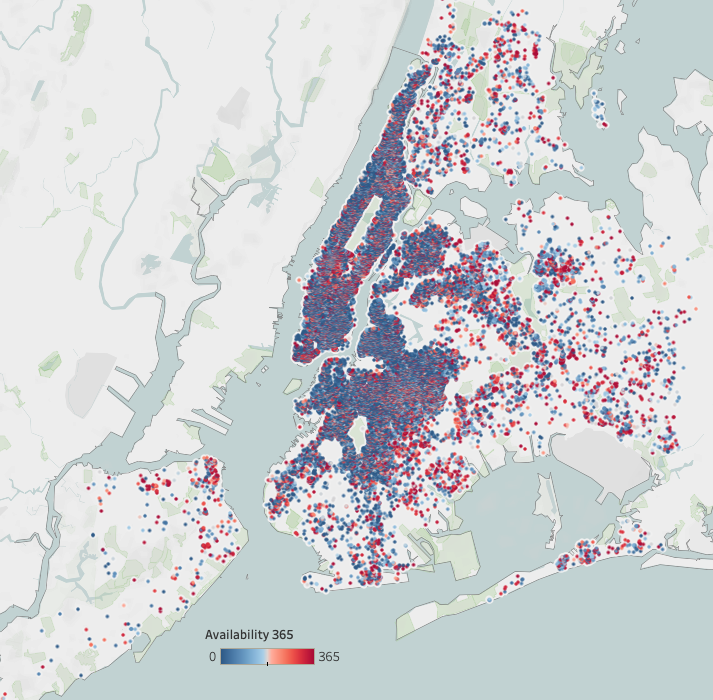

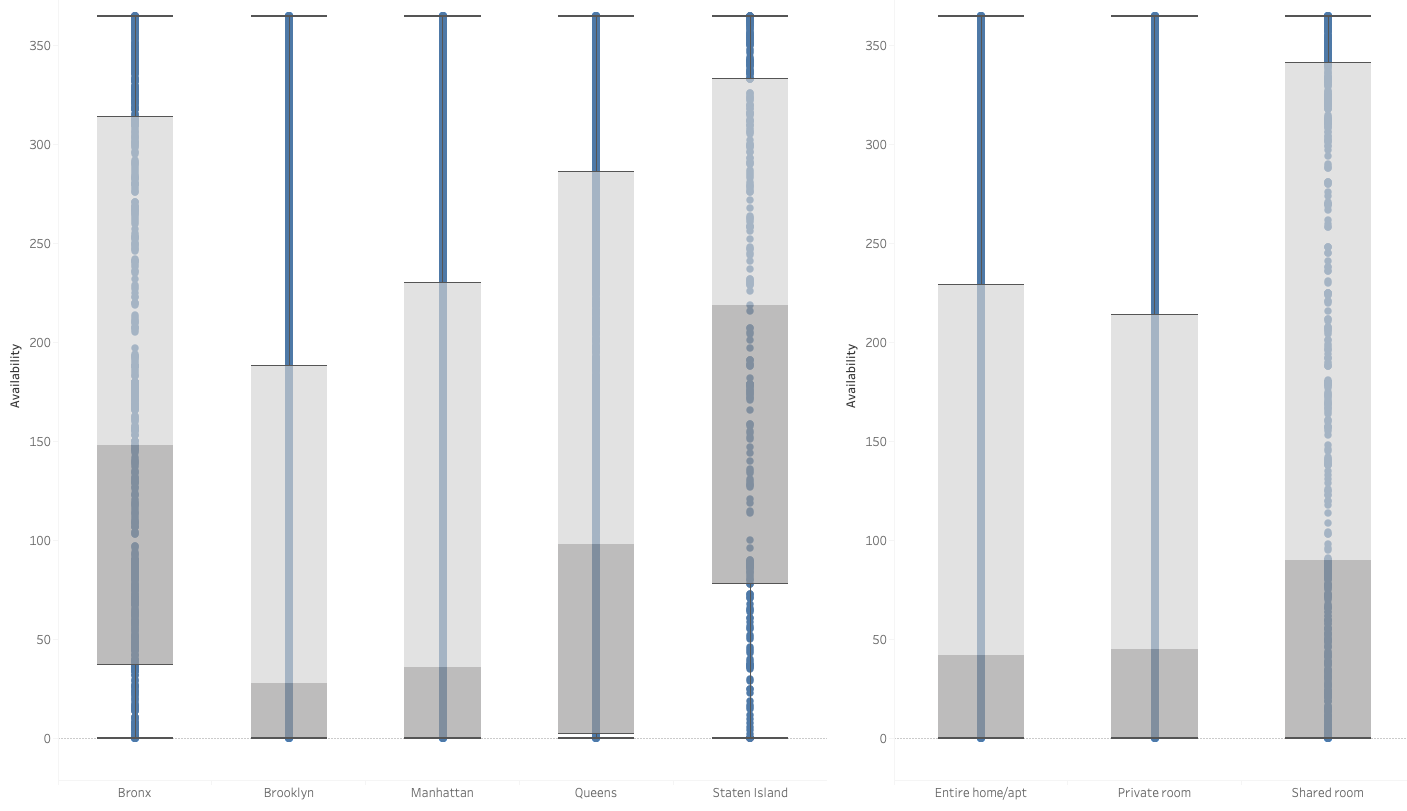

### Name

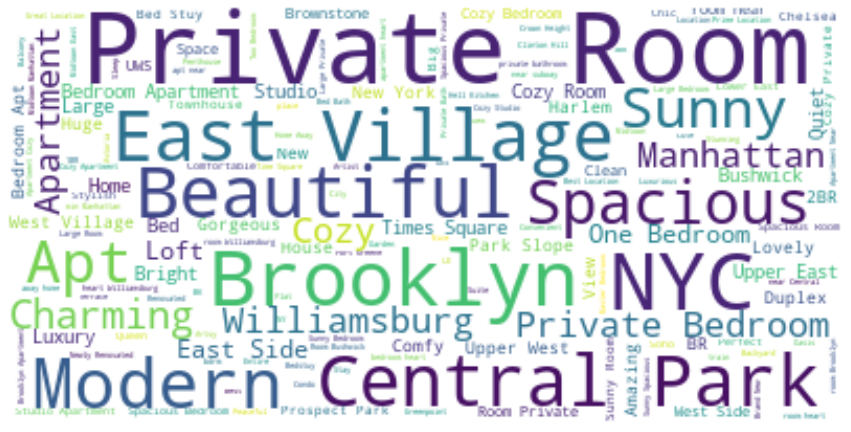

In [215]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.name)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="white").generate(text)
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
pass

### Price

**Price boxplot for different groups**

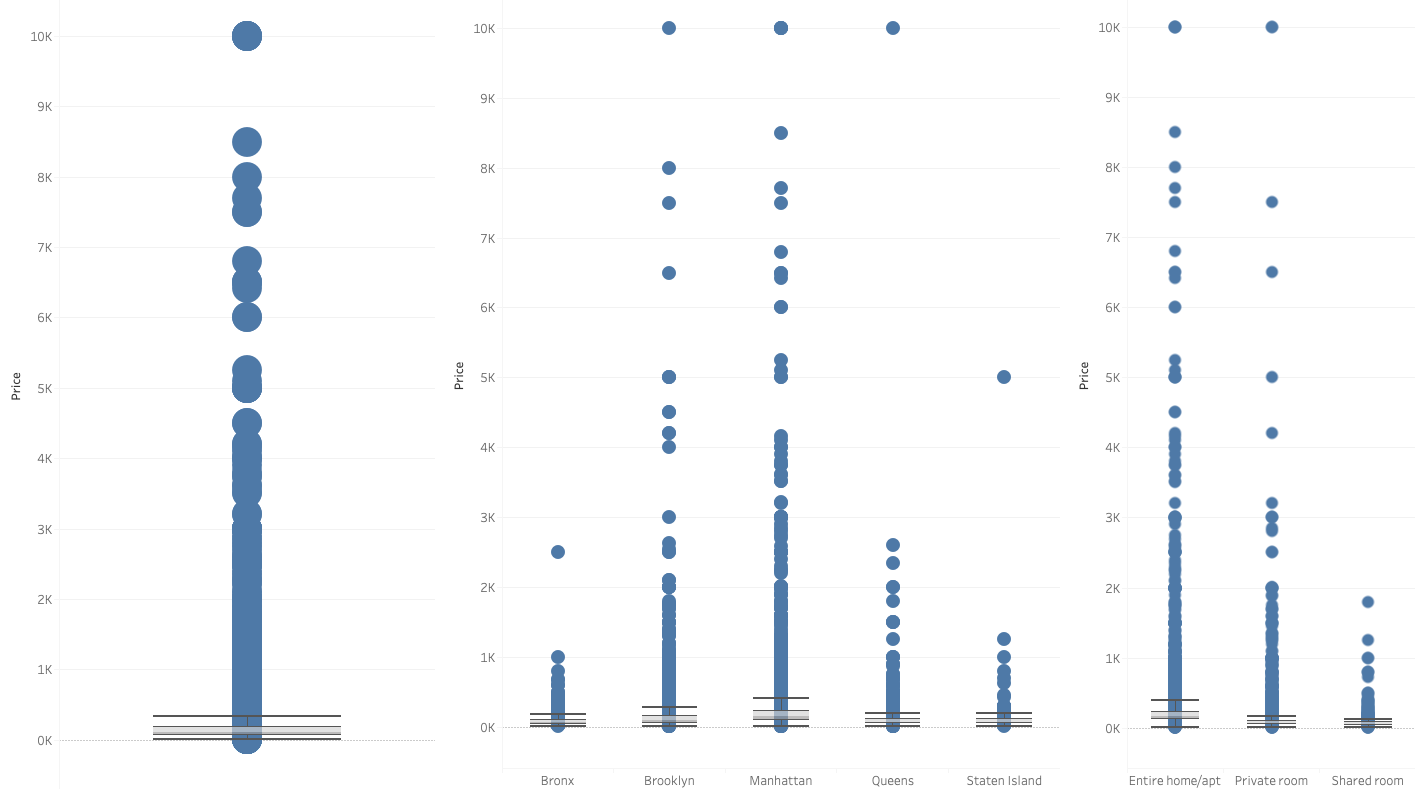

Here we can see the majority data has price under 500. Therefore we will look at that price range closely.

### Price Under 500

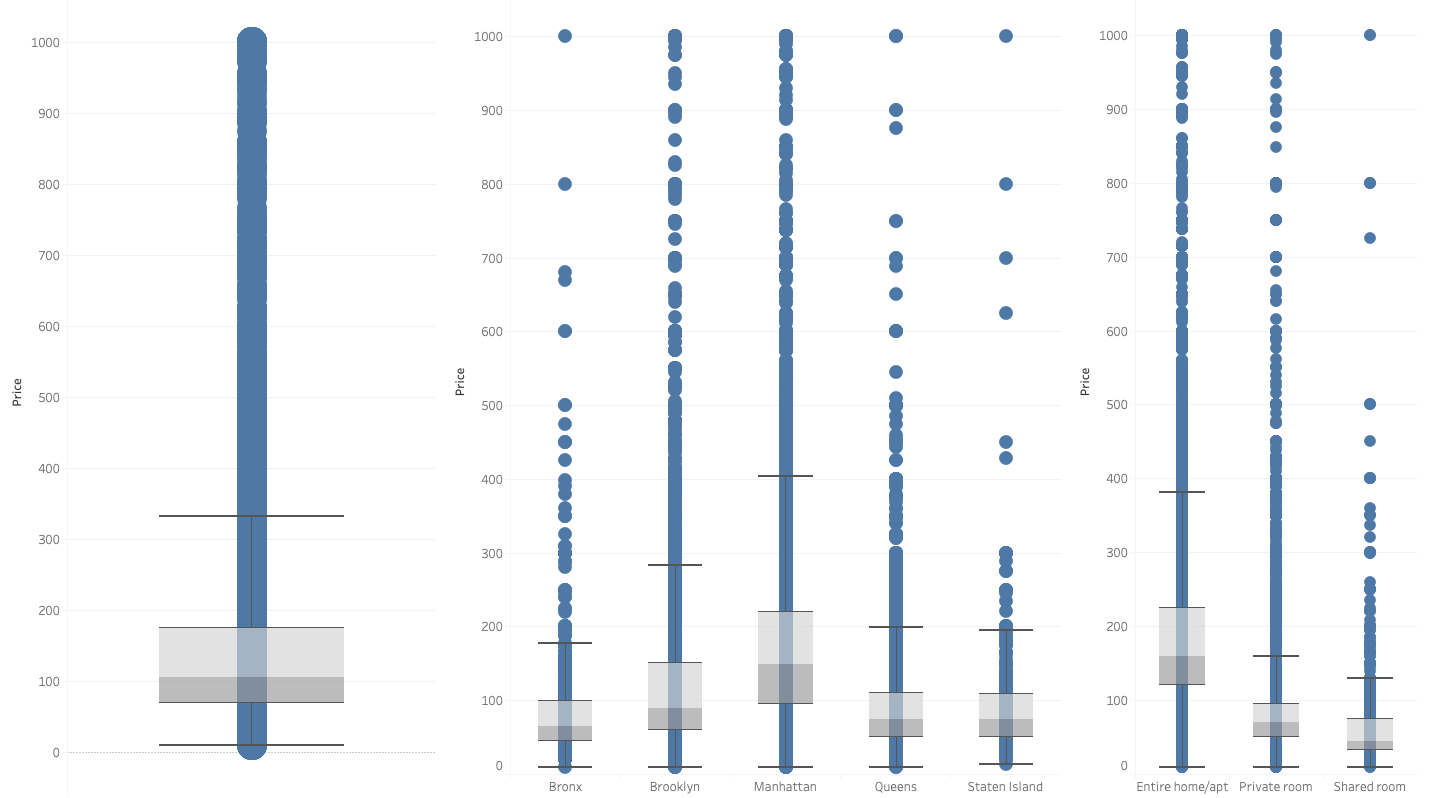

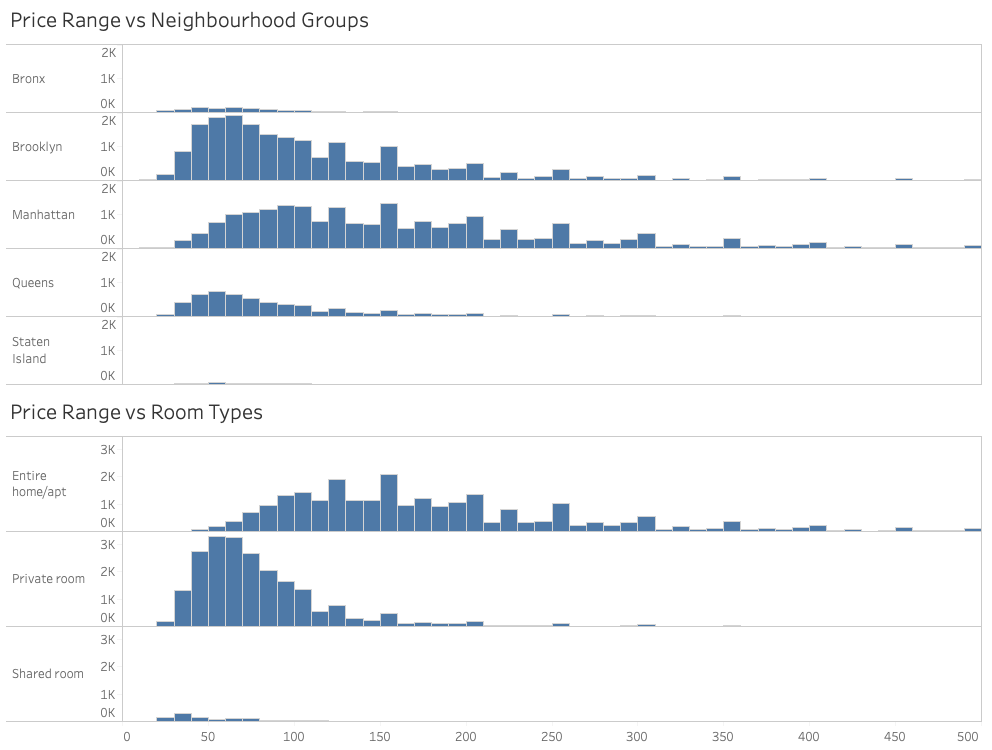

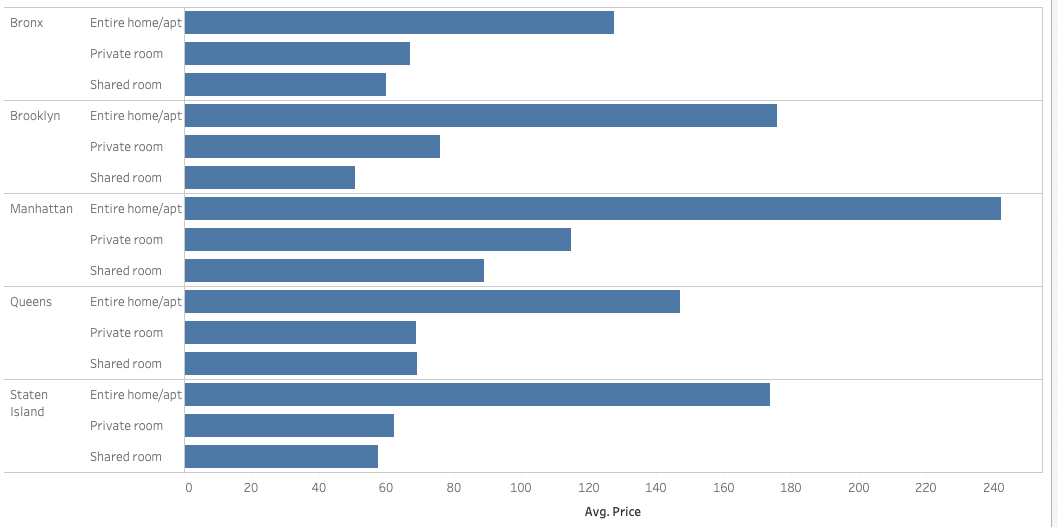

Price For Top 10 Neighbourhoods

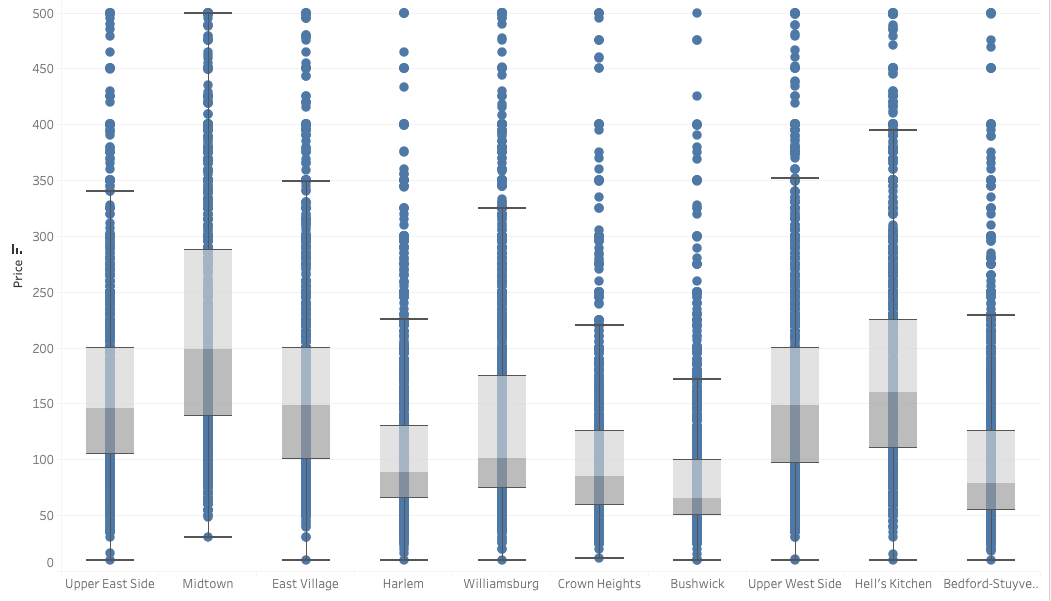

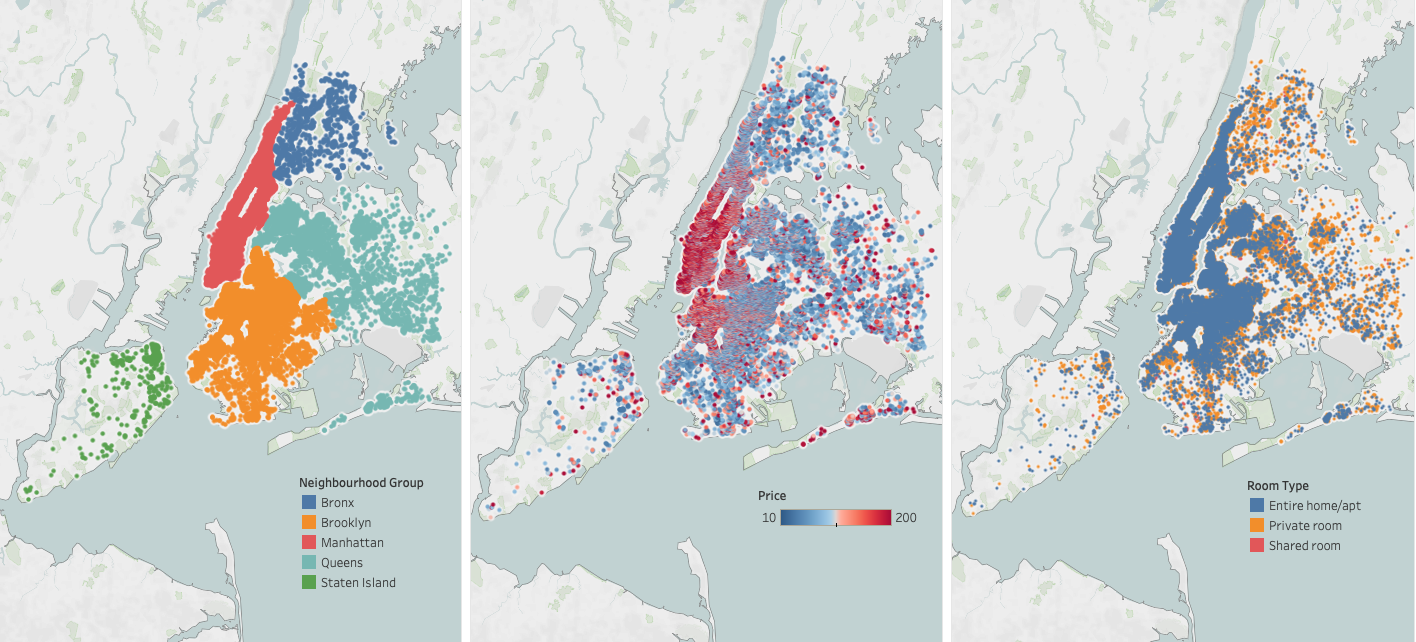

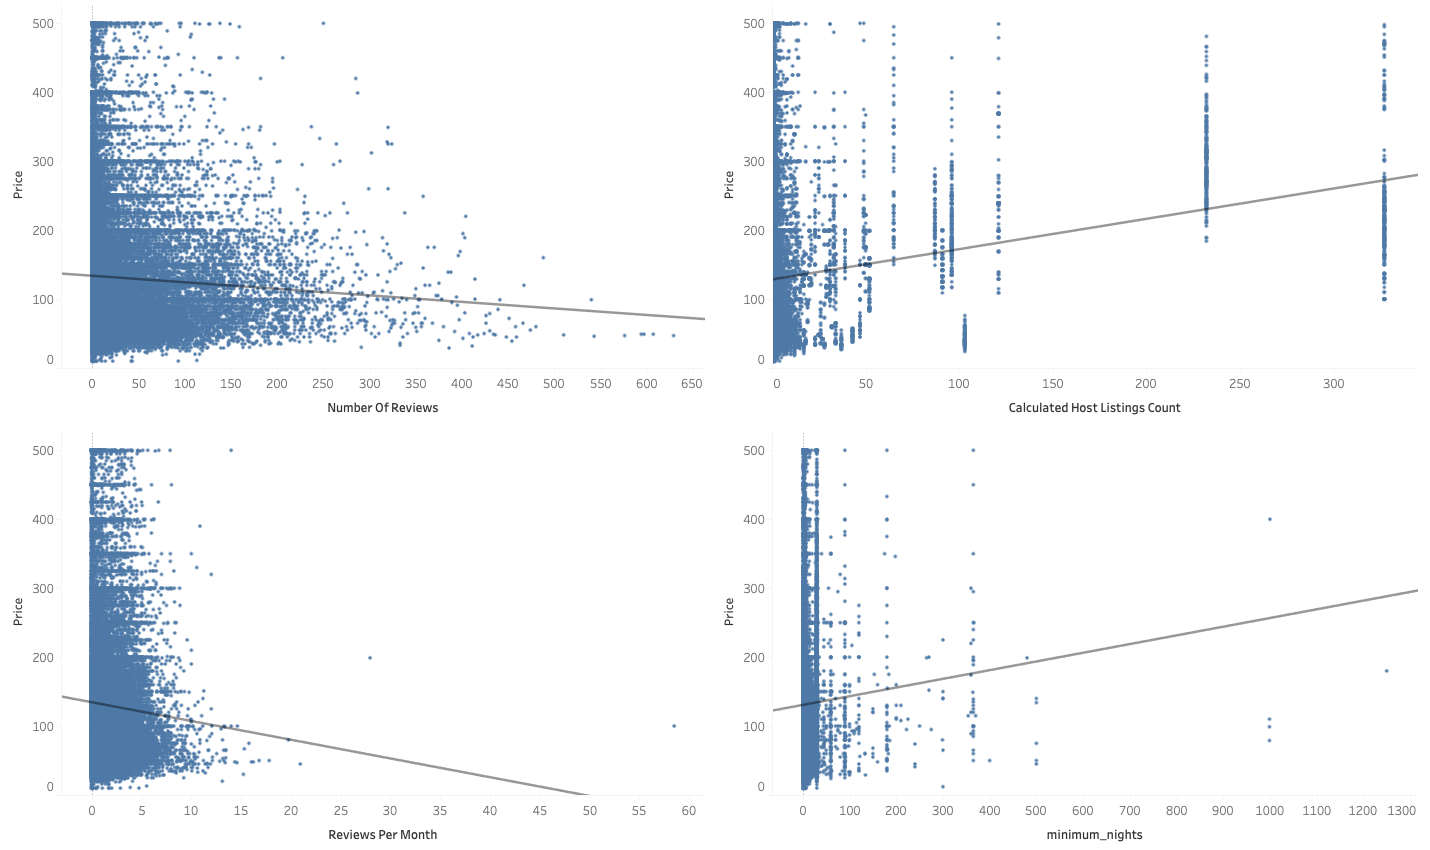

# Feature Selection

In [216]:
df.drop(['name', 'host_id'], axis = 1, inplace = True)
df_model = df.copy()
df_model.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# Feature Engineering

### Transform Target Feature


 mu = 152.76 and sigma = 240.20



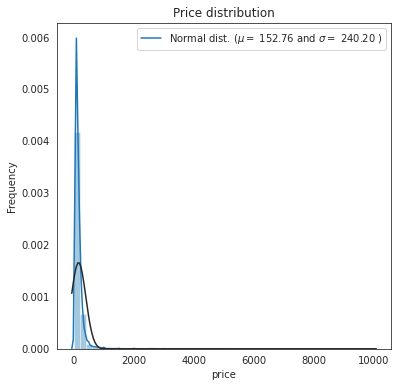

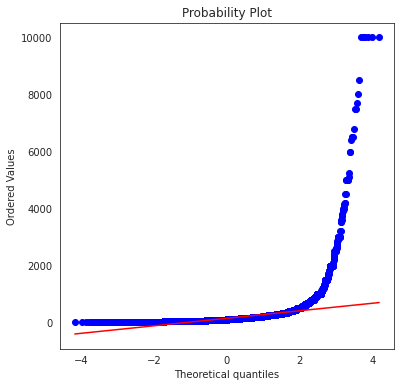

In [147]:
from scipy.stats import norm
from scipy import stats
sns.distplot(df['price'] , fit=norm)
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_model['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_model['price'], plot=plt)
plt.show()


 mu = 4.74 and sigma = 0.69



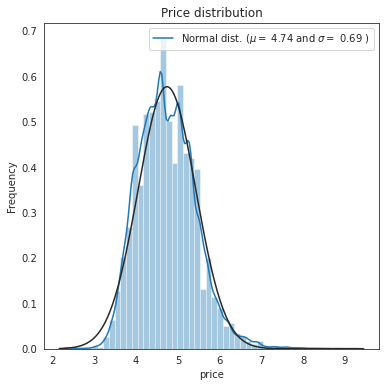

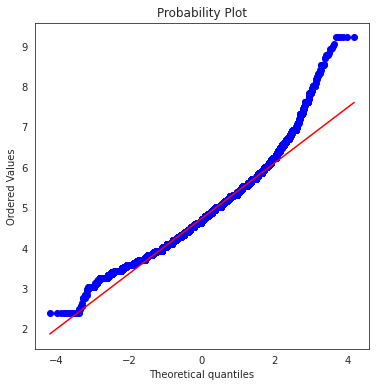

In [148]:
df_model["price"] = np.log1p(df_model["price"])

#Check the new distribution 
sns.distplot(df_model['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_model['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_model['price'], plot=plt)
plt.show()

### Label Encoding

In [149]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_model['neighbourhood'] = label_encoder.fit_transform(df_model['neighbourhood'])
df_model['room_type'] = label_encoder.fit_transform(df_model['room_type'])
df_model['neighbourhood_group'] = label_encoder.fit_transform(df_model['neighbourhood_group'])
df_model.head()


neighbourhood_group  ...  availability_365
0                    1  ...               365
1                    2  ...               355
2                    2  ...               365
3                    1  ...               194
4                    2  ...                 0

[5 rows x 11 columns]

### Data Skewness

In [150]:
from scipy.stats import norm, skew

numeric_feats = df_model.dtypes[df_model.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = df_model[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



Skew
minimum_nights                  20.997069
calculated_host_listings_count   7.930665
number_of_reviews                3.690497
reviews_per_month                3.301104
longitude                        1.284652
availability_365                 0.763288
price                            0.629611
room_type                        0.422607
neighbourhood_group              0.373484
neighbourhood                    0.255758

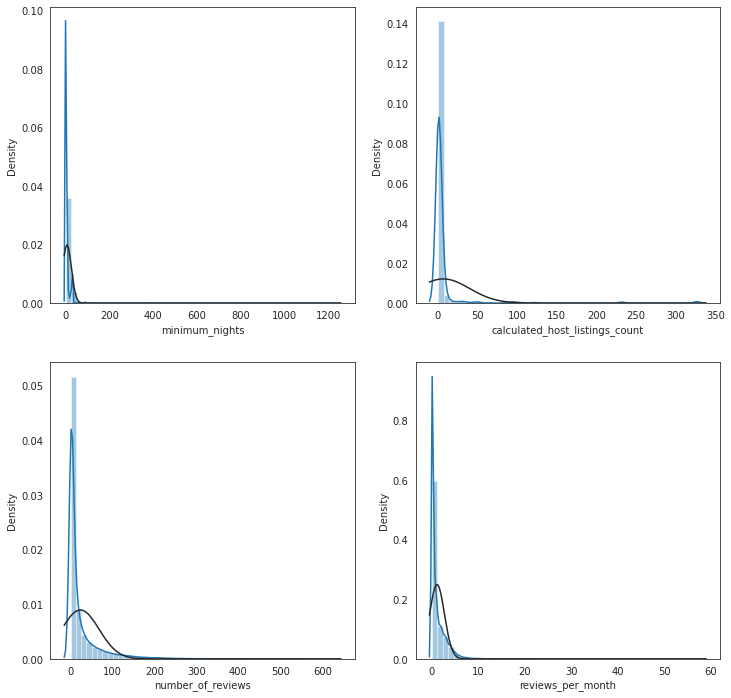

In [151]:
fig, saxis = plt.subplots(2, 2,figsize=(12,12))
sns.distplot(df_model['minimum_nights'] , fit=norm, ax = saxis[0,0])
sns.distplot(df_model['calculated_host_listings_count'] , fit=norm, ax = saxis[0,1])
sns.distplot(df_model['number_of_reviews'] , fit=norm, ax = saxis[1,0])
sns.distplot(df_model['reviews_per_month'] , fit=norm, ax = saxis[1,1])

In [152]:
from scipy.special import boxcox1p
df_model['minimum_nights'] = boxcox1p(df_model['minimum_nights'], 0.15)
df_model['calculated_host_listings_count'] = boxcox1p(df_model['calculated_host_listings_count'], 0.15)
df_model['number_of_reviews'] = boxcox1p(df_model['number_of_reviews'], 0.15)
df_model['reviews_per_month'] = boxcox1p(df_model['reviews_per_month'], 0.15)

In [153]:
from scipy.stats import norm, skew #for some statistics

numeric_feats = df_model.dtypes[df_model.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = df_model[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



Skew
calculated_host_listings_count  3.921767
minimum_nights                  1.893771
longitude                       1.284652
reviews_per_month               1.088284
availability_365                0.763288
number_of_reviews               0.714837
price                           0.629611
room_type                       0.422607
neighbourhood_group             0.373484
neighbourhood                   0.255758

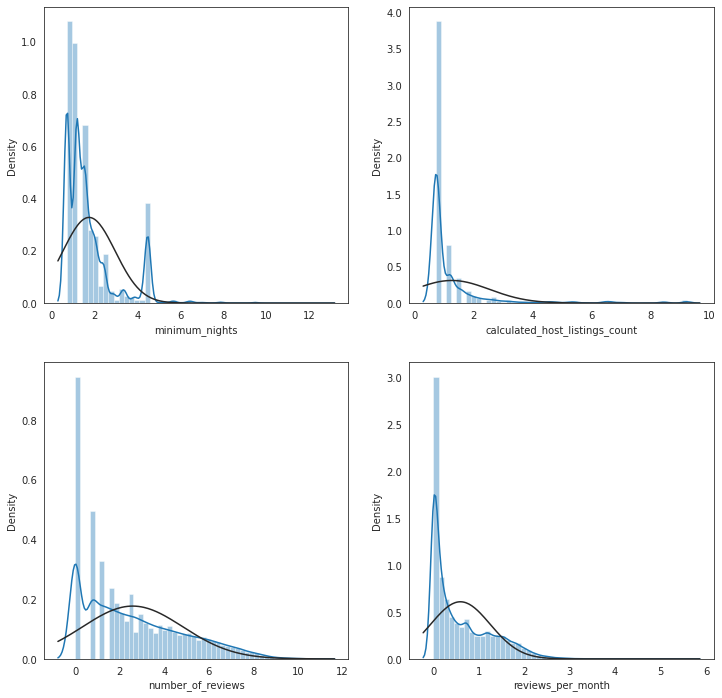

In [154]:
fig, saxis = plt.subplots(2, 2,figsize=(12,12))
sns.distplot(df_model['minimum_nights'] , fit=norm, ax = saxis[0,0])
sns.distplot(df_model['calculated_host_listings_count'] , fit=norm, ax = saxis[0,1])
sns.distplot(df_model['number_of_reviews'] , fit=norm, ax = saxis[1,0])
sns.distplot(df_model['reviews_per_month'] , fit=norm, ax = saxis[1,1])

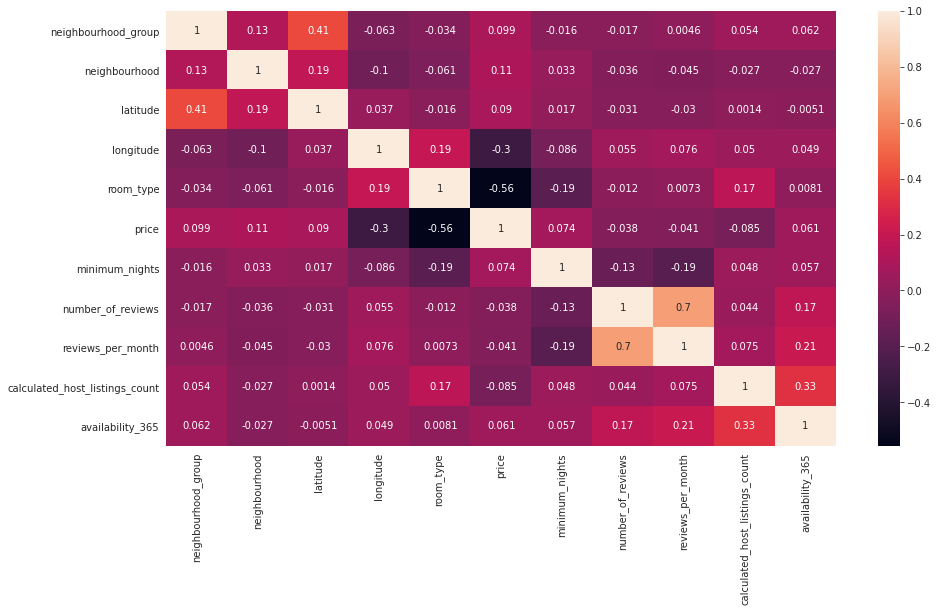

In [155]:
corr = df_model.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

### Data Scaling

In [156]:
from sklearn.preprocessing import RobustScaler
X = df_model.loc[:, df_model.columns != 'price']
X = RobustScaler().fit_transform(X)
y = df_model['price']
print(X[:5])
print(y[:5])

[[-1.          0.11023622 -1.03512255 -0.35660075  1.         -0.61161547
   0.20386214 -0.13173901  3.29674644  1.40969163]
 [ 0.          0.25984252  0.41811584 -0.60032068  0.         -0.61161547
   0.91478338  0.00779115  1.          1.36563877]
 [ 0.          0.          1.1767082   0.29481561  1.          0.
  -0.60331442 -0.32923132  0.          1.40969163]
 [-1.         -0.41732283 -0.51958099 -0.08701229  0.         -0.61161547
   1.97374774  1.6879171   0.          0.65638767]
 [ 0.         -0.25984252  1.03279474  0.25013362  0.          1.01486994
   0.20386214 -0.23119101  0.         -0.19823789]]
0    5.010635
1    5.420535
2    5.017280
3    4.499810
4    4.394449
Name: price, dtype: float64


# Building Model

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

### Train/Test Split

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_test.shape[0])

No. of samples in training set:  36651
No. of samples in validation set: 12217


### Define Evaluation Function
The evaluation metric we are going to use for this project is Root-mean-square deviation (RMSE). 

In [159]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5))
    return (rmse)

### Lasso Regression

In [160]:
lasso = Lasso(alpha =0.001, random_state=42)
scores = {}

score = rmse_cv(lasso)
print("lasso: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lasso'] = (score.mean(), score.std())

lasso: 0.5014 (0.0042)


Text(0, 0.5, 'coefficients')

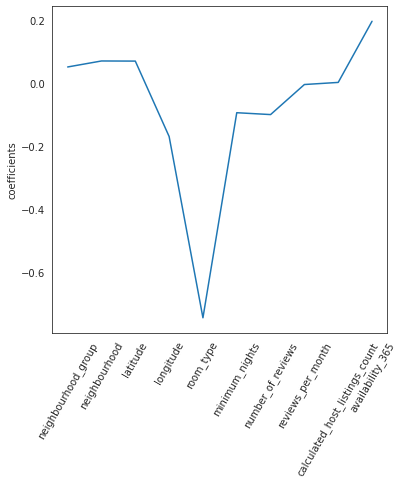

In [161]:
lasso_coef = lasso.fit(X_train, y_train).coef_
names = ['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation = 60)
plt.ylabel('coefficients')

### Ridge Regression

In [162]:
ridge = Ridge(alpha = 10, random_state = 42)

score = rmse_cv(ridge)
print("ridge: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ridge'] = (score.mean(), score.std())

ridge: 0.5014 (0.0041)


### ElasticNet

In [163]:
elastic_net = ElasticNet(alpha=0.0001, l1_ratio = 0.3, random_state=42)

score = rmse_cv(elastic_net)
print("elastic_net: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['elastic_net'] = (score.mean(), score.std())

elastic_net: 0.5014 (0.0041)


### XGBoosting

In [174]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.05,
                       max_depth=6,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       seed=27,
                       random_state=1)
score = rmse_cv(xgb)
print("xgboosting: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std())

xgboosting: 0.4394 (0.0054)


**Feature Importance**

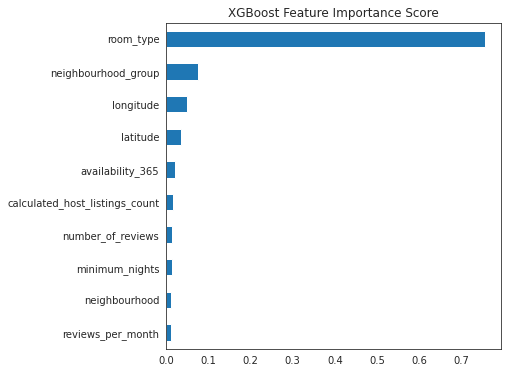

In [175]:
xgb.fit(X_train, y_train)
importance = xgb.feature_importances_
names = ['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']
pd.DataFrame(index = names, data = importance).sort_values(by = 0, ascending = True).plot(kind = 'barh', legend = False, title = 'XGBoost Feature Importance Score')

### Averaged Models

In [176]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)

        return self
    
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [177]:
averaged_models = AveragingModels(models = (lasso, ridge, elastic_net, xgb))
score = rmse_cv(averaged_models)
print("averaged: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['averaged'] = (score.mean(), score.std())

averaged: 0.4766 (0.0047)


# Model Tuning

In [168]:
from sklearn.model_selection import GridSearchCV

### Lasso Regression

In [169]:

alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
          0.3, 0.6, 1]
param_grid = {'alpha': alphas}
lasso_cv = GridSearchCV(lasso, param_grid = param_grid, cv=5)
lasso_cv.fit(X_train, y_train)
score = rmse_cv(lasso_cv)
print("lasso: {:.4f} ({:.4f})".format(score.mean(), score.std()))
print(lasso_cv.best_params_)
scores['lasso'] = (score.mean(), score.std())

lasso: 0.5014 (0.0041)
{'alpha': 0.0001}


### Ridge Regression

In [170]:
alphas = [1, 3, 5, 10, 30, 60]
param_grid = {'alpha': alphas}
ridge_cv = GridSearchCV(ridge, param_grid = param_grid, cv=5)
ridge_cv.fit(X_train, y_train)
score = rmse_cv(ridge_cv)
print("ridge: {:.4f} ({:.4f})".format(score.mean(), score.std()))
print(ridge_cv.best_params_)
scores['ridge'] = (score.mean(), score.std())

ridge: 0.5014 (0.0041)
{'alpha': 5}


### Elastic Regression

In [171]:
l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1]
alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
          0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6]
param_grid = {'alpha': alphas,
              'l1_ratio': l1_ratio}
elastic_cv = GridSearchCV(elastic_net, param_grid = param_grid, cv=5)
elastic_cv.fit(X_train, y_train)

score = rmse_cv(elastic_cv)
print("elastic_net: {:.4f} ({:.4f})".format(score.mean(), score.std()))
print(elastic_cv.best_params_)
scores['elastic_net'] = (score.mean(), score.std())

elastic_net: 0.5014 (0.0041)
{'alpha': 0.0001, 'l1_ratio': 0.3}


### XGBoost

In [179]:
param_grid = {"learning_rate"    : [ 0.05],
              "max_depth"        : [ 4, 6, 8],
              "min_child_weight" : [ 0, 1],
              "gamma"            : [ 0.4, 0.6, 0.8],
              'subsample'        : [ 0.7],
              "colsample_bytree" : [ 0.7],
              'objective'        : [ 'reg:squarederror'],
              'seed'             : [ 27], 
              'random_state'     : [ 42]}
xgb_cv = GridSearchCV(xgb, param_grid = param_grid, cv=3, scoring = 'neg_mean_squared_error')
xgb_cv.fit(X_train, y_train)
print(np.sqrt(-xgb_cv.best_score_))
print(xgb_cv.best_params_)
scores['xgb'] = (np.sqrt(-xgb_cv.best_score_), 0)

0.43644308571465823
{'colsample_bytree': 0.7, 'gamma': 0.4, 'learning_rate': 0.05, 'max_depth': 8, 'min_child_weight': 0, 'objective': 'reg:squarederror', 'random_state': 42, 'seed': 27, 'subsample': 0.7}


#Model Comparison

### Performance Summary

In [194]:
pd.DataFrame(scores, index=['RMSE score', 'std']).head(1).T.sort_values(by = 'RMSE score')

RMSE score
xgb            0.436443
averaged       0.476598
lasso          0.501361
elastic_net    0.501362
ridge          0.501364

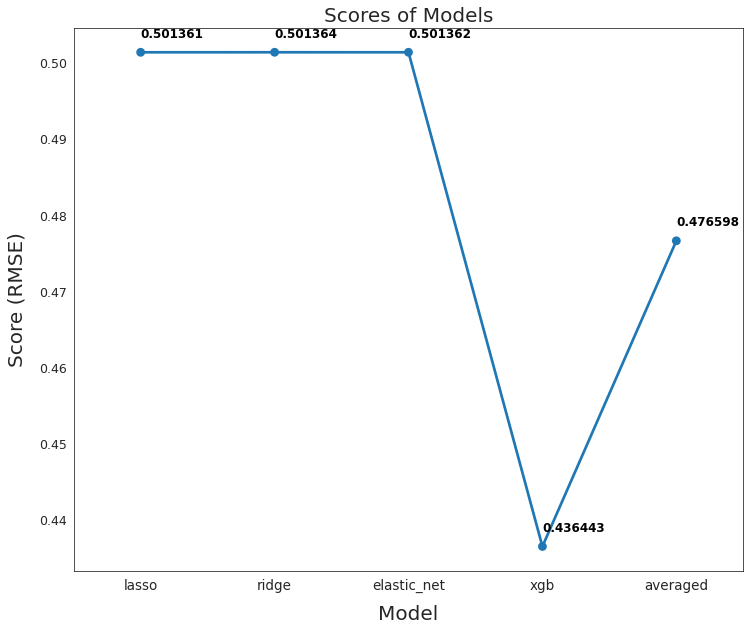

In [181]:
sns.set_style("white")
fig = plt.figure(figsize=(12, 10))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

From the plot we can clearly see that XGBoost has the best performance! The best RMSE score is 0.4364, which is a decent score. 

### Residual Plot
We will also make the residual plot to visualize our predictions for XGBoosti model.  

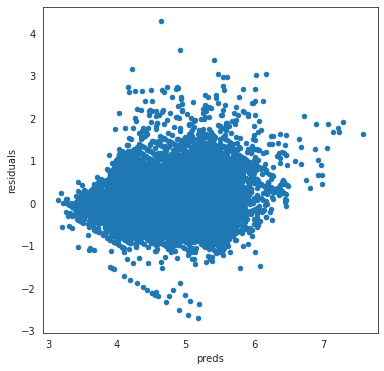

In [183]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":xgb_cv.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

The residual plot looks normal, but we do see we have some troubling predicting the price at higher price range. The predicted values tend to be higher than actual values. 

# Conclusion

In this project, we performed in-depth data exploration, data visualization, and data prediction for an Airbnb open dataset published on Kaggle.com. Most parts of the project were done by Google Colab Python Shell and data visualization was mainly done using tableau Desktop. 

The dataset does not contain a lot of missing values therefore there is not much we needed to do for data cleaning except for some simple data computing for missing values. 

Data skewness is a substantial issue for this dataset. In order to improve model accuracy, we transformed target feature with log transformation and for the rest we used Box Cox transformation. We then scaled all feature values with RobustScaler.

Then we started building our prediction model. For this project, we picked Lasso Regression, Ridge Regression, Elastic-Net, XGBoosting models to test our base-line performance. We also created an stacked model by simply averaging these regression models mentioned above. 

After that, we fine-tuned the hyperparameters for each model and compare their performance scores with each other. Overall, XGBoosting gives us the best result out of all models. We got a decent RMSE score of 0.436 and a healthy residual plot. 

In further analysis, we could try other ways to transform categorical data to improve the performance. Also, we did not completely solved the data skewness issue in the dataset, therefore we will also try different ways to make these features more normally distributed. 